# Step 4 - Chemical Evolution Trends

This notebook presents how to confront your Milky Way model with stellar abundances data.

**Open-source Python packages**
* [NuPyCEE](https://github.com/NuGrid/NuPyCEE) - NuGrid Python Chemical Evolution Environment
* [JINAPyCEE](https://github.com/becot85/JINAPyCEE) - JINA Python Chemical Evolution Environment

In [1]:
# Import the OMEGA+ code and standard packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from JINAPyCEE import omega_plus
from NuPyCEE import stellab

# Create an instance of Stellab
s = stellab.stellab()

### Select your Input Stellar Yields Table

You should re-run the notebook with different yields table. The chemical evolution predictions are very sensitive to the choice of input stellar yields.

In [2]:
# Karakas et al. (2010) for AGB stars - http://adsabs.harvard.edu/abs/2010MNRAS.403.1413K
# Kobayashi et al. (2006) for massive stars - http://adsabs.harvard.edu/abs/2006ApJ...653.1145K
table = 'yield_tables/agb_and_massive_stars_K10_K06_0.5HNe.txt'

# NuGrid - Ritter et al. (2018) - http://adsabs.harvard.edu/abs/2018MNRAS.480..538R
#table = 'yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt'

### Run OMEGA+ with the Input Parameters Defined in Step 1

In [3]:
# Define the input parameters constrained during Step 1
sfe = 0.02
t_star = 1.0e8
in_mag = 1.0

# Run OMEGA+ with your set of parameters (simple Milky Way model)
exp_infall = [[in_mag*40, 0.0, 0.8e9], [in_mag*5, 1.0e9, 7.0e9]]
o = omega_plus.omega_plus(sfe=sfe, t_star=t_star, exp_infall=exp_infall, \
                          special_timesteps=90, table=table)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 4.31s
   OMEGA+ run completed - Run time: 4.31s


### Compare your Predictions with Stellar Abundances Data

In [4]:
# Select observational data
obs = ['stellab_data/milky_way_data/Cohen_et_al_2013_stellab',\
       'stellab_data/milky_way_data/Jacobson_et_al_2015_stellab',\
       'stellab_data/milky_way_data/Venn_et_al_2004_stellab',\
       'stellab_data/milky_way_data/Bensby_et_al_2014_stellab',\
       'stellab_data/milky_way_data/Nissen_et_al_2014_stellab',\
       'stellab_data/milky_way_data/Battistini_Bensby_2015_stellab',\
       'stellab_data/milky_way_data/Battistini_Bensby_2016_stellab']

<IPython.core.display.Javascript object>


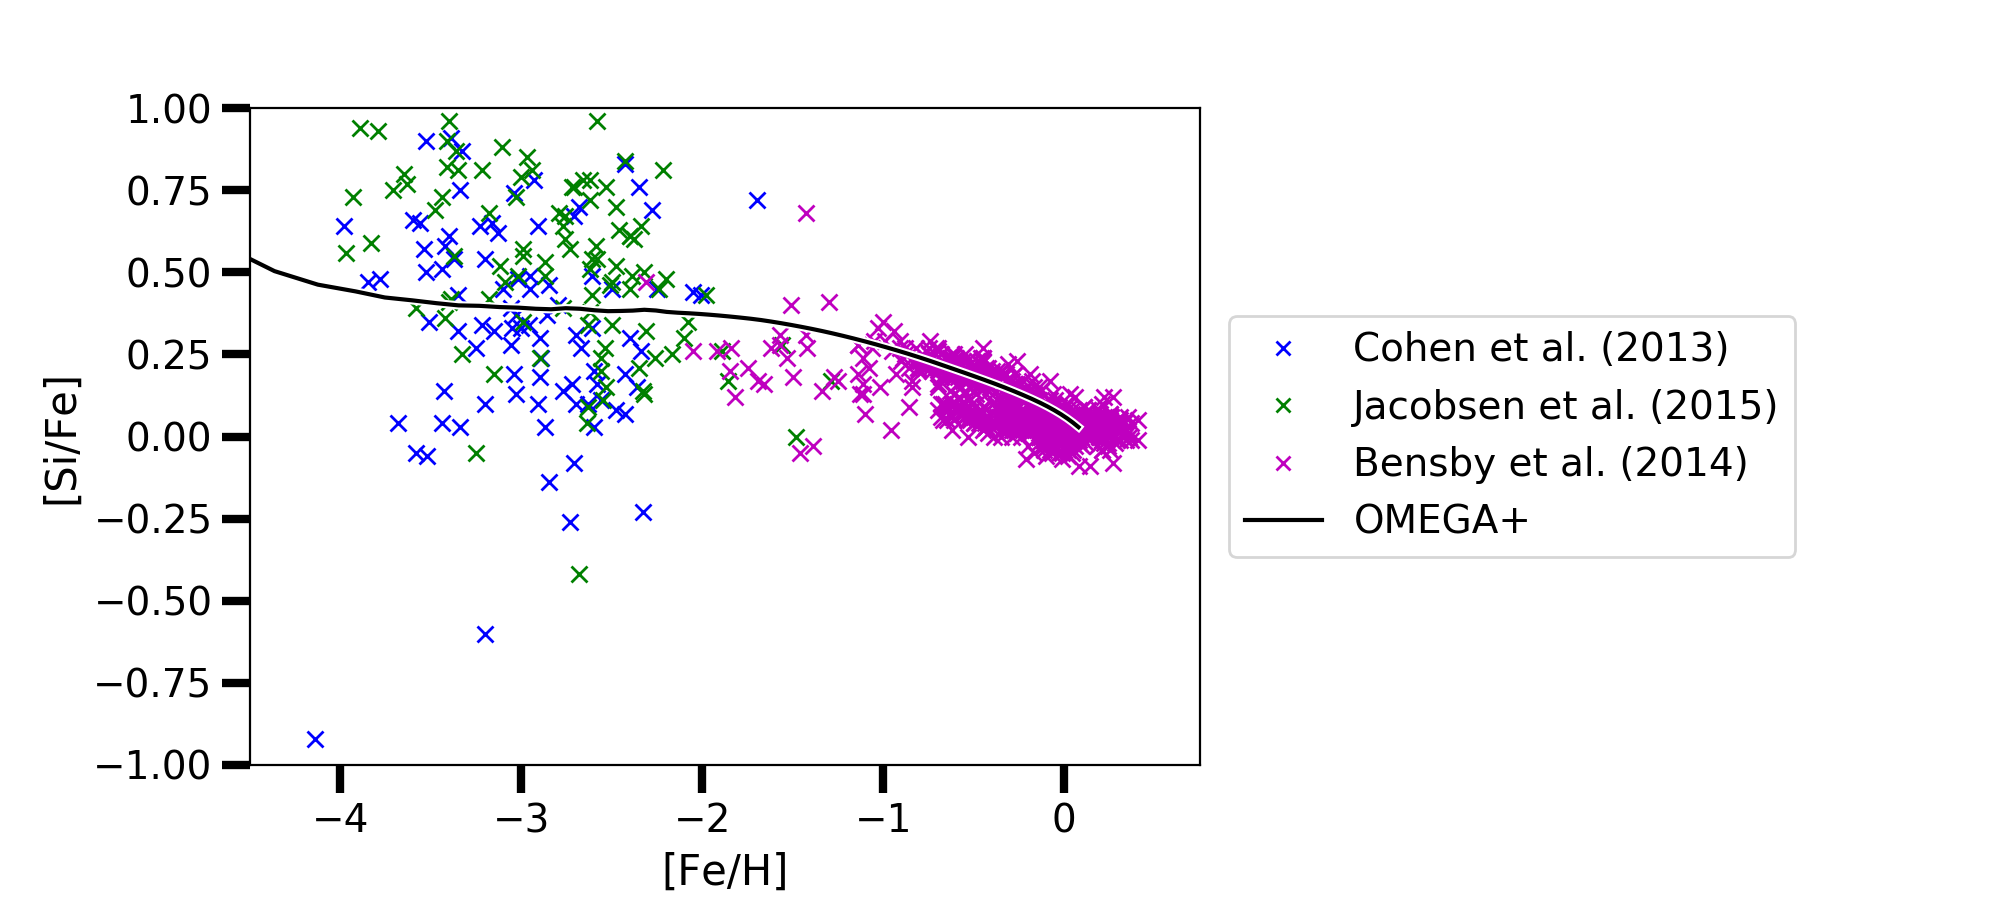

(-1.0, 1.0)

In [6]:
# Select the abundance ratios.
yaxis = '[Si/Fe]'
xaxis = '[Fe/H]'

# Plot stellar abundances data with STELLAB.
%matplotlib nbagg
s.plot_spectro(xaxis=xaxis, yaxis=yaxis, obs=obs, norm='Asplund_et_al_2009')

# Extract the numerical prediction of OMEGA+ using the "return_x_y" argument.
xy_o = o.inner.plot_spectro(xaxis=xaxis, yaxis=yaxis, \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

# Overplot your chemical evolution predictions on top of observations.
# Here I plot a thicker white line behind the black line to improve its
# visibility when the line goes through many data points.
plt.plot(xy_o[0], xy_o[1], color='w', linewidth=3.0)
plt.plot(xy_o[0], xy_o[1], color='k', linewidth=1.5, label='OMEGA+')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=14)
plt.xlim(-4.5,0.75)
plt.ylim(-1.,1.)

# Exercise 1
* Explain the origin of **decreasing trends at [Fe/H] > -1**. Using [Si/Fe]-vs-[Fe/H] is a good example.
* To succeed, use the plotting functions in OMEGA+ presented in Step 2 to understand which nucleosynthetic events produce most of each individual elements (e.g., Si and Fe).
* **Important reminder:** This is a timescale argument, and [Fe/H] is a proxy for time (see Step 1).

In [7]:
# Create additional cells here to complete the exercise.

# Exercise 2
* Re-run the notebook with a different yields table (see above). This is to show how chemical evolution predictions are sensitive to the choice of input stellar yields.

# Exercise 3
* Using NuGrid yields, try to find a weird feature in the predictions, and isolate the stellar models that cause that feature.
    * .. you might want to look at Cr ..
* To succeed, run SYGMA and use the plotting function presented in Step 2.

In [8]:
# Create additional cells here to complete the exercise.